# Investigating The Movie Database

### The Data set
[The Movie Database](https://www.themoviedb.org/about) (TMDb) is a movie and TV database built by the public since 2008. This specific data set was created by a user on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home), who utilized TMDb's API to pull **movie** data from 1960 to 2017.

### The Questions
1. On average, Do actors and actresses with longer careers produce movies with higher user ratings?
2. On average, Do actors and actresses who have been in more films produce movies with higher user ratings?
3. Which actor/actress was in the most movies, and how did that actor's movie user ratings change over his/her career?

### Some Limitations
1. The dataset was built by the community, so the 'User Ratings' are completely subjective and unmonitored. It is possible that someone could enter a score into the system without actually believing in that score. 
2. The dataset may not contain every single movie made between 1960 and 2017, it is unknown how movies were selected to be in this dataset.
3. A maximum of 5 members of the cast are represented for an individual movie. This means some actors/actresses could have been in a movie, but this dataset may not have included them.

### The Wrangle Proccess

In [1]:
# Hides warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Allow Jupyter Notebook to use custom modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from models.the_movie_database import TheMovieDatabase

TheMovieDatabase class was built to import and proccess the raw TMDb dataset. Further information regarding this class can be found by checking the [soure code](https://github.com/DataWranglerRyan/DAND-P2-Investigate-TMDB/blob/master/models/the_movie_database.py).

In [3]:
tmdb = TheMovieDatabase('../data/tmdb-movies.csv')

In [4]:
# This is a sample of what the original dataset looks like
tmdb.df_orig.head(1)

,,,,,,,imdb_id,budget,revenue,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,budget_adj
id,original_title,popularity,release_year,revenue_adj,vote_average,vote_count,,,,,,,,,,,,,,
135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,tt0369610,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1.379999e+08


#### Here are the main wrangle procedures that took place:
1. The original dataset had a field called 'cast', which listed up to 5 actors separated by a pipe '|'. In order to answer questions from an 'actor' level of detail, this 'cast' column was exploded. This means each actor in a movie was split into his or her own row for that movie.

2. Movies that did not have any actors in the 'cast' column were removed from the data set.

In [5]:
# This is an example of exploding the cast column. Notice each actor is separated into their own row.
tmdb.df_exploded.query("original_title == 'Jurassic World'")

,id,original_title,popularity,release_year,revenue_adj,vote_average,vote_count,actor
43589,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Vincent D'Onofrio
43590,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Bryce Dallas Howard
43591,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Chris Pratt
43592,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Nick Robinson
43593,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Irrfan Khan


3. Each actor was grouped and then aggregate statistics were calculated for each actor. Aggregate statistics included metrics like 'average popularity', 'number of movies', 'average movie user rating' (aka vote_average), etc.

In [6]:
# Here is an example of all of the movies that Chris Pratt was in
tmdb.df_exploded.query("actor == 'Chris Pratt'")

,id,original_title,popularity,release_year,revenue_adj,vote_average,vote_count,actor
13277,10521,Bride Wars,1.074072,2009,1.165440e+08,5.8,501,Chris Pratt
27412,21862,Deep in the Valley,0.309360,2009,0.000000e+00,4.2,13,Chris Pratt
38056,58547,10 Years,1.109807,2011,1.949905e+05,5.6,100,Chris Pratt
38324,60308,Moneyball,1.081676,2011,1.068337e+08,6.9,899,Chris Pratt
38620,63492,What's Your Number?,1.120851,2011,2.949500e+07,6.2,390,Chris Pratt
39450,72207,The Five-Year Engagement,1.095479,2012,5.120048e+07,5.6,319,Chris Pratt
41806,97630,Zero Dark Thirty,1.554441,2012,1.261457e+08,6.5,1240,Chris Pratt
42792,118340,Guardians of the Galaxy,14.311205,2014,7.122911e+08,7.9,5612,Chris Pratt
43591,135397,Jurassic World,32.985763,2015,1.392446e+09,6.5,5562,Chris Pratt
44071,146239,Delivery Man,1.304540,2013,4.789131e+07,6.1,377,Chris Pratt


In [7]:
# In this example, all of Chris Pratt's movies were grouped into one row and aggregate statistics were calculated.
tmdb.get_actor_metrics().query("actor == 'Chris Pratt'")

,actor,avg_popularity,number_of_movies,vote_average,vote_count,revenue_adj,first_year,last_year
3246,Chris Pratt,5.594719,10,6.13,15013,2.583042e+08,2009,2015


From here, further wrangling took place depending on the question that was being answered.

### Answering the Questions
##### Question 1: On average, Do actors and actresses with longer careers produce movies with higher user ratings?

For the purposes of this analysis, *career length* is defined by the release year of an actor's first movie in this dataset minus the release year of that actor's last movie in this dataset. For example, Chris Pratt's first movie in this dataset was from 2009 and his last movie was in 2015, so his career length is 6 years.

In order to create a bar chart, categorical data needed to be created from numerical data. This was achieved by bucketing *career length* into bins with intervals of every 5 years.

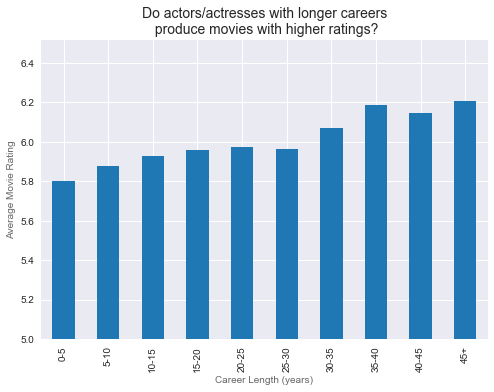

In [8]:
tmdb.plot_avg_rating_by_career_len()

From the above chart, it appears that average movie ratings increase for actor's who have had longer careers. However, it is important to note that the sample size decreases significantly for actors with longer career lengths.

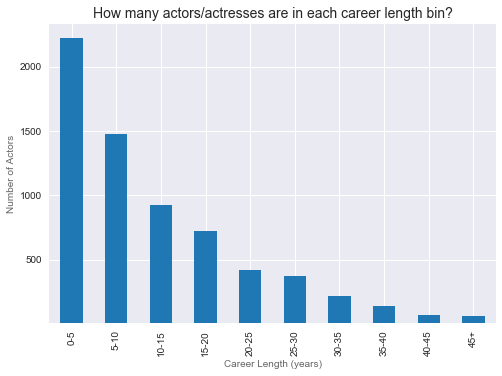

In [9]:
tmdb.plot_num_actors_by_career_len()

##### Question 2: On average, Do actors and actresses who have been in more films produce movies with higher user ratings?

There appears to be a slightly positive trend in average movie ratings for actors that have starred in more movies. However, it is difficult to determine if the average movie rating is directly correlated to the number of movies an actor starred in.

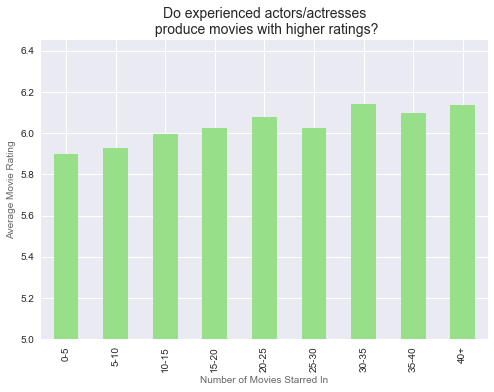

In [10]:
tmdb.plot_avg_rating_by_movie_exp()

##### Question 3: Which actor/actress was in the most movies, and how did that actor's movie user ratings change over his/her career?
Robert De Niro has starred in 72 movies, which is the most in this dataset.

In [13]:
tmdb.get_actor_metrics()[['actor','number_of_movies']].head()

,actor,number_of_movies
15340,Robert De Niro,72
16078,Samuel L. Jackson,71
2508,Bruce Willis,62
13621,Nicolas Cage,61
12583,Michael Caine,53


This line chart shows that over time, Robert De Niro's movie ratings have been declining.

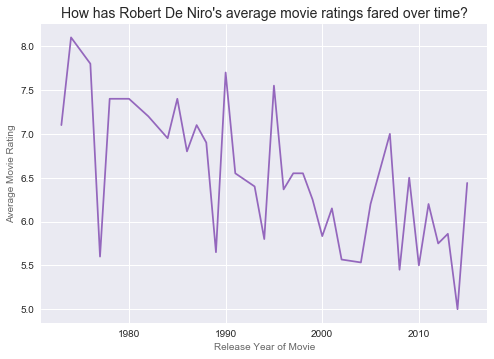

In [14]:
tmdb.plot_an_actors_avg_ratings_over_time('Robert De Niro')